In [186]:
import numpy as np
from phasediv import PhaseDiv2
import matplotlib.pyplot as plt
%matplotlib inline
import tifffile

In [187]:
size_X = 512;
size_Y = 512;
p = PhaseDiv2(dshape = (size_Y,size_X),   # shape of the output stack (Nz,Ny,Nx)
              units = (.2,)*2,          # pixelsize (dz,dy,dx) in micron
              lam = 0.5,                # wavelength in micron
              NA=0.8,                 # Numerical Aperture of the detection obcejtive
              n = 1.33                  # refractive index of medium
              )

In [237]:
intial_wavefront = 1*p.zernike(4)

In [238]:
p1 = np.fft.fftshift(p._psf_incoherent(intial_wavefront))
P1 = np.fft.fft2(p1)

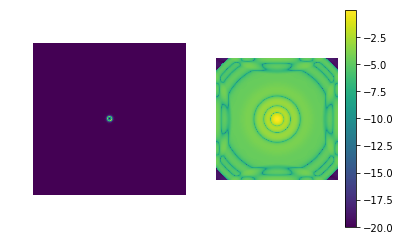

In [239]:
plt.subplot(1,2,1)
plt.imshow(p1);
plt.axis('OFF');
plt.subplot(1,2,2)
plt.imshow(np.log(abs(np.fft.fftshift(P1))))
plt.colorbar()
plt.axis('OFF');

In [240]:
# Generating artificial image
o = tifffile.imread("/Users/dsaha/Desktop/lena-std.tif")
O = np.fft.fft2(o)

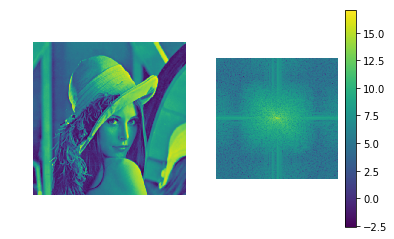

In [241]:
plt.subplot(1,2,1)
plt.imshow(o);
plt.axis('OFF');
plt.subplot(1,2,2)
plt.imshow(np.log(abs(np.fft.fftshift(O))))
plt.colorbar()
plt.axis('OFF');

In [242]:
I1 = np.multiply(O,P1)
i1 = np.fft.fft2(I1)

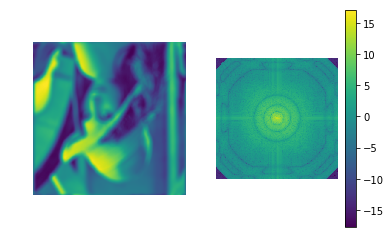

In [249]:
plt.subplot(1,2,1)
plt.imshow(abs(np.fft.fftshift((i1))));
plt.axis('OFF');
plt.subplot(1,2,2)
plt.imshow(np.log(abs(np.fft.fftshift(I1))))
plt.colorbar()
plt.axis('OFF');

In [263]:
abb_wavefront =  2*p.zernike(4)

In [264]:
p2 = np.fft.fftshift(p._psf_incoherent(abb_wavefront))
P2 = np.fft.fft2(p2)

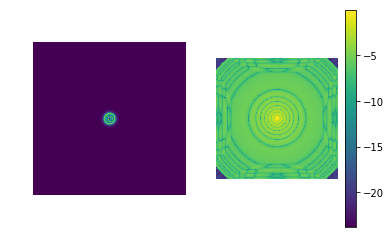

In [265]:
plt.subplot(1,2,1)
plt.imshow(p2);
plt.axis('OFF');
plt.subplot(1,2,2)
plt.imshow(np.log(abs(np.fft.fftshift(P2))))
plt.colorbar()
plt.axis('OFF');

In [266]:
I2 = np.multiply(O,P2)
i2 = np.fft.fft2(I2)

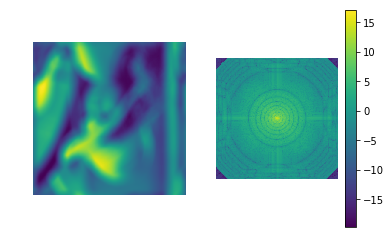

In [267]:
plt.subplot(1,2,1)
plt.imshow(abs(np.fft.fftshift((i2))));
plt.axis('OFF');
plt.subplot(1,2,2)
plt.imshow(np.log(abs(np.fft.fftshift(I2))))
plt.colorbar()
plt.axis('OFF');

In [275]:
_O = (I1-I2)/(P1-P2)
_o = np.fft.fft2(_O)

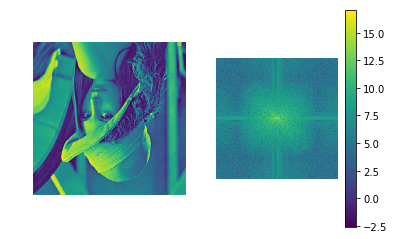

In [277]:
plt.subplot(1,2,1)
plt.imshow(abs(_o));
plt.axis('OFF');
plt.subplot(1,2,2)
plt.imshow(np.log(abs(np.fft.fftshift(_O))))
plt.colorbar()
plt.axis('OFF');

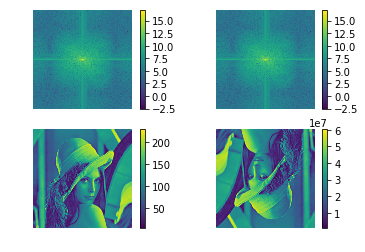

In [281]:
plt.subplot(2,2,1)
plt.imshow(np.log(abs(np.fft.fftshift(O))))
plt.axis('OFF');
plt.colorbar()
plt.subplot(2,2,2)
plt.imshow(np.log(abs(np.fft.fftshift(_O))))
plt.colorbar()
plt.axis('OFF');
plt.subplot(2,2,3)
plt.imshow(o)
plt.axis('OFF');
plt.colorbar()
plt.subplot(2,2,4)
plt.imshow(abs(_o))
plt.colorbar()
plt.axis('OFF');